# Data Science Class with Onoja Anthony, PhD (Email: donmaston09@gmail.com)

#### Follow our Page on FaceBook: DataEdge Academy

#### Subscribe to our YouTube channel: @tonyonoja7880

#### Note: to run this script, you have to install the relevant Python packages and the datasets. 

### Introduction
#### What is Hyperparameter Tuning?
Hyperparameters are model settings that control the learning process but are not learned from the data.
Hyperparameter tuning is the process of selecting optimal values to improve model performance.

Example: In a Random Forest model, hyperparameters include the number of trees (n_estimators) and the maximum depth (max_depth).

##### What is GridSearch?

GridSearch is a technique used to find the best combination of hyperparameters.

🔹 It tests all possible parameter combinations based on predefined values.

🔹 Uses cross-validation to evaluate each combination.

📌 GridSearch systematically explores parameter combinations:

What is Cross-Validation?

Cross-validation (CV) is a technique for evaluating model performance by splitting data into multiple training/testing sets.

🔹 It ensures the model generalizes well to unseen data.
    
🔹 Reduces the risk of overfitting.

📌 Examples of CV include leave-one-out, and stratified k-fold cross-validation (k=5)

#### Hyperparameter GridSearch

Why Are Hyperparameters Important?
Hyperparameters control how the model learns, affecting:

✅ Model Complexity – Avoids overfitting/underfitting

✅ Training Time – Too many parameters increase training cost

✅ Prediction Accuracy – Optimized models perform better

📌 Example of Hyperparameters in a Random Forest Model:

Hyperparameter	    Description
n_estimators:       Number of trees in the forest
max_depth	:       Maximum depth of each tree
min_samples_split:  Minimum samples required to split a node

# 1) Regression Example

#### Step 1: Import necessary libraries 

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.datasets import fetch_california_housing
import warnings

# Suppress all warnings
warnings.filterwarnings('ignore')

In [ ]:
#!pip install pandas # How to install package

In [2]:
# Load California housing dataset
data = fetch_california_housing()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

In [3]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [4]:
# Check for missing values
print(df.isnull().sum())

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
target        0
dtype: int64


Why?

Helps identify missing values.
Ensures no corrupted data exists.

In [5]:
## Summary stats

print(df.describe())

             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0.333333      3.000000   
25%        2.563400     18.000000      4.440716      1.006079    787.000000   
50%        3.534800     29.000000      5.229129      1.048780   1166.000000   
75%        4.743250     37.000000      6.052381      1.099526   1725.000000   
max       15.000100     52.000000    141.909091     34.066667  35682.000000   

           AveOccup      Latitude     Longitude        target  
count  20640.000000  20640.000000  20640.000000  20640.000000  
mean       3.070655     35.631861   -119.569704      2.068558  
std       10.386050      2.135952      2.003532      1.153956  
min        0.692308     32.54000

 Why?

Shows mean, min, max, and percentiles of each feature.
Helps detect outliers (e.g., abnormally high house prices).

### Step 2: Perform Exploratory Data Analysis

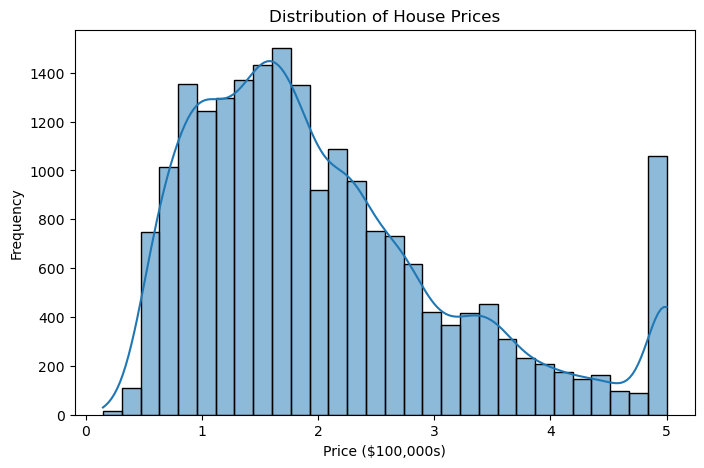

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
# Distribution of House Prices (Target Variable)
plt.figure(figsize=(8, 5))
sns.histplot(df['target'], bins=30, kde=True)
plt.title("Distribution of House Prices")
plt.xlabel("Price ($100,000s)")
plt.ylabel("Frequency")
plt.show()

Why?

Identifies skewness (is the data normally distributed?).
Helps decide if log transformations are needed.

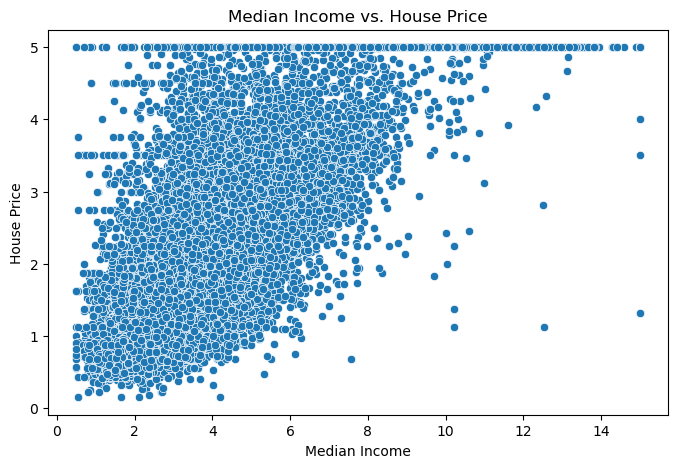

In [7]:
## Relationship Between Key Features and House Price
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df['MedInc'], y=df['target'])
plt.title("Median Income vs. House Price")
plt.xlabel("Median Income")
plt.ylabel("House Price")
plt.show()

Why?

Helps visually confirm correlations between features and prices.
Example: Higher income neighborhoods tend to have more expensive homes.

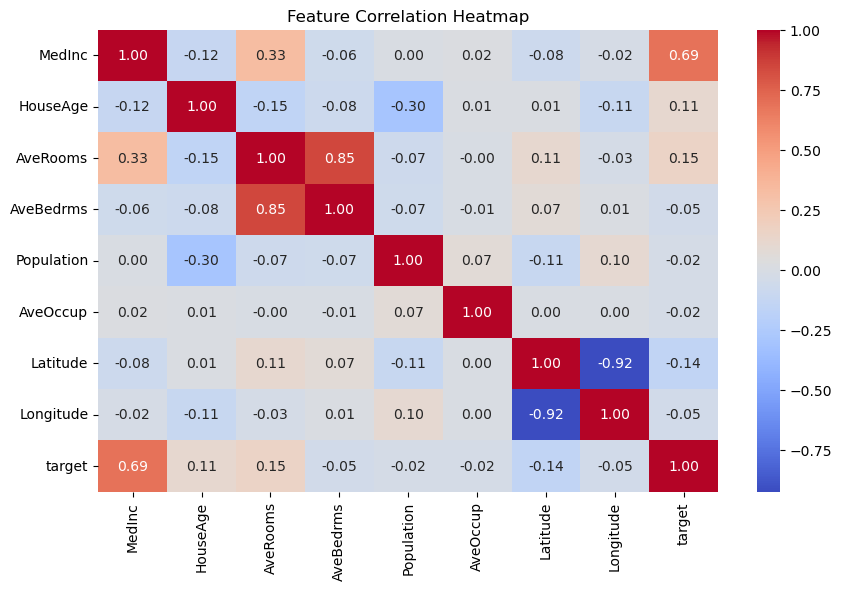

In [8]:
### Visualise Correlation Heatmap

plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

### Interpretation:

- High correlation values (closer to 1 or -1) suggest strong relationships between variables.

- Example: If Median Income has a strong positive correlation with House Price, we know income is a key predictor.

### Step 3: Data Pre-processing

In [9]:
# Train-test split
X = df.drop(columns=['target'])
y = df['target']

# split the dataset into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Train the Models without Model Tuning

### 1) Train a Linear Regression Model

In [10]:
from sklearn.linear_model import LinearRegression

# Initialize and train the model
lr_model = LinearRegression()

lr_model.fit(X_train, y_train)

# Make predictions
y_pred = lr_model.predict(X_test)

Why Linear Regression?

Simple baseline model to compare future improvements.
Helps understand feature importance and impact.

### Evaluate Model Performance

In [11]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Compute evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Print results
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R² Score: {r2:.4f}")

Mean Absolute Error (MAE): 0.5332
Mean Squared Error (MSE): 0.5559
Root Mean Squared Error (RMSE): 0.7456
R² Score: 0.5758


### Metrics Explained

- MAE → Average absolute difference between actual & predicted prices.
  
- RMSE → Penalizes large errors more than MAE.

- R² Score → Measures how well the model explains variability (1 = perfect, 0 = no explanation).

### Visualise Predictions vs. Actual Prices

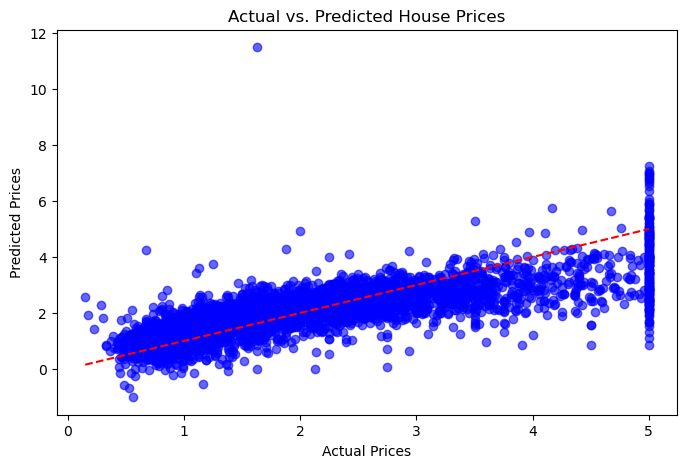

In [12]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred, alpha=0.6, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', color='red')  # Ideal line
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs. Predicted House Prices")
plt.show()

📌 What to Look For?

- If predictions align closely with the red line, the model performs well.

- Large deviations indicate potential underfitting or feature improvements needed.


#### 2) Train a Random Forest Regression Model

In [13]:
from sklearn.ensemble import RandomForestRegressor

# Initialize the model with default parameters
rf_model = RandomForestRegressor(random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)

📌 Why Random Forest?

- Handles non-linearity and interactions between variables better than linear regression.

- ess prone to overfitting compared to individual decision trees.


### Evaluate Model Performance

In [14]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Compute evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Print results
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R² Score: {r2:.4f}")

Mean Absolute Error (MAE): 0.3275
Mean Squared Error (MSE): 0.2554
Root Mean Squared Error (RMSE): 0.5053
R² Score: 0.8051


📌 Metrics Explained

- MAE → Measures the average absolute difference between actual & predicted values.
    
- RMSE → Penalizes large errors more than MAE.
    
- R² Score → Measures how well the model explains variability (closer to 1 = better).

### Visualise Predictions vs. Actual Values

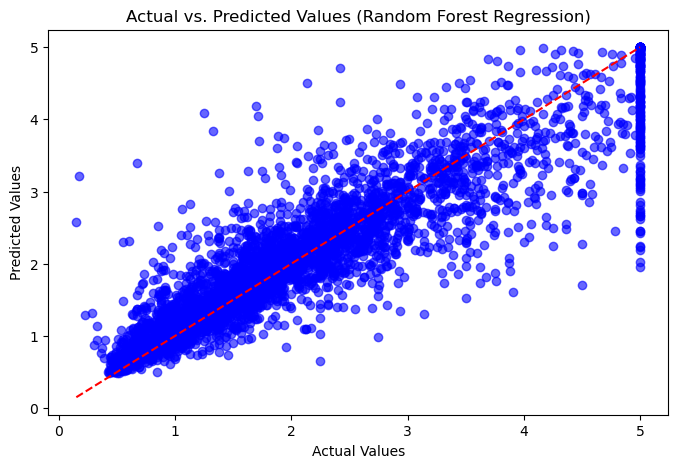

In [15]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred, alpha=0.6, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', color='red')  # Ideal line
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values (Random Forest Regression)")
plt.show()

📌 What to Look For?

- If predictions align closely with the red line, the model performs well.
    
- Large deviations indicate potential underfitting or feature improvements needed.


## Step 3 Hyperparameter Tuning with GridSearchCV

In [16]:
# Define hyperparameter grid
param_grid = {
    'n_estimators': [10, 20, 50], # 50, 100, 200
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(RandomForestRegressor(), param_grid, cv=5, scoring='neg_mean_absolute_error')
grid_search.fit(X_train, y_train)

# Best parameters
print("Best parameters:", grid_search.best_params_)

Best parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 50}


This finds the optimal settings for better price predictions.

### Cross-Validation

In [17]:
cv_scores = cross_val_score(RandomForestRegressor(**grid_search.best_params_), X_train, y_train, cv=5, scoring='neg_mean_absolute_error')
print("Cross-validation mean MAE:", np.mean(cv_scores))


Cross-validation mean MAE: -0.3390745004600079


### Model Evaluation

In [18]:
# Train the best model
best_model = RandomForestRegressor(**grid_search.best_params_)
best_model.fit(X_train, y_train)

# Predictions
y_pred = best_model.predict(X_test)

# Evaluate performance
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)

Mean Absolute Error: 0.33140839011627904
Mean Squared Error: 0.25981995453876133


In [19]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Compute evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Print results
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R² Score: {r2:.4f}")

Mean Absolute Error (MAE): 0.3314
Mean Squared Error (MSE): 0.2598
Root Mean Squared Error (RMSE): 0.5097
R² Score: 0.8017


# Classification Task

### Titanic Dataset Overview

The Titanic dataset comes from the famous Titanic disaster that took place in 1912, where the RMS Titanic sank after hitting an iceberg. The dataset is widely used for machine learning classification tasks, particularly in predicting whether a passenger survived or not, based on certain features of the passengers.

This dataset is available through platforms like Kaggle, and it has been used extensively in data science tutorials and competitions.

#### An Overview of the Problem

The primary problem you're solving with this dataset is to predict whether a passenger survived or not based on certain passenger features (such as their age, sex, class, and other factors). This is a binary classification problem, where:

The target variable is Survived, with two possible values:

- 1: Passenger survived.
  
- 0: Passenger did not survive.

  
#### Aim

The aim of this project is to:

1. Predict survival on the Titanic for passengers using various features.
2. Understand the impact of different features on survival rates.
4. Apply machine learning techniques to classify whether a passenger survived or not based on their characteristics.
5. Use different algorithms (Logistic Regression and Random Forest Classifier) and tune their hyperparameters to optimize the model performance.
6. Evaluate the performance using cross-validation, accuracy, and AUC-ROC curve.

##### Key Features (Variables)

PassengerId: Unique identifier for each passenger.
Pclass: The class of the passenger (1st, 2nd, or 3rd).
Name: Name of the passenger.
Sex: Gender of the passenger (Male/Female).
Age: Age of the passenger (Some values might be missing).
SibSp: The number of siblings or spouses aboard the Titanic.
Parch: The number of parents or children aboard the Titanic.
Fare: The amount of money the passenger paid for the ticket.
Cabin: The cabin number (some missing values).
Embarked: The port where the passenger boarded the Titanic (C = Cherbourg; Q = Queenstown; S = Southampton).
Survived: Whether the passenger survived (1) or not (0). (Target variable)

#### Hypothesis and Insights

Through this dataset, we can test a number of hypotheses, such as:

Did women survive more than men?
Did passengers in first class have a higher survival rate?
Did children have a higher survival rate?
Was there a correlation between fare paid and survival?
Did people with family members aboard have a higher chance of survival?
By analyzing these factors and building predictive models, we aim to identify the most important features for predicting survival on the Titanic.

#### Objective

The goal of the task is to:

- Preprocess the data: Clean and prepare it for modeling.
- Train classifiers: Train multiple classifiers (like Logistic Regression and Random Forest) on the dataset.
- Tune models: Use techniques like GridSearchCV to fine-tune the hyperparameters.
- Evaluate the models: Evaluate using performance metrics like accuracy, precision, recall, F1-score, and the ROC curve.
  
The final model will provide insights into the features that influence survival and offer a predictive model to classify whether a passenger would survive or not, based on the available information.

In [20]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_curve, auc
from sklearn.preprocessing import StandardScaler

In [21]:
# Load Titanic Dataset

# Load the Titanic dataset
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"

df = pd.read_csv(url)


In [22]:
df.head() # preview the dataset

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### 1. Exploratory Data Analysis (EDA)

In [23]:
print(df.info())  # Check for missing values and data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [24]:
print(df.describe())  # Statistical summary of numerical columns

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


In [25]:
# 2. Missing Value Analysis
missing_data = df.isnull().sum()
missing_data_percentage = (df.isnull().sum() / df.isnull().count()) * 100
missing_data_summary = pd.DataFrame({'Missing Values': missing_data, 'Percentage': missing_data_percentage})
print(missing_data_summary)

             Missing Values  Percentage
PassengerId               0    0.000000
Survived                  0    0.000000
Pclass                    0    0.000000
Name                      0    0.000000
Sex                       0    0.000000
Age                     177   19.865320
SibSp                     0    0.000000
Parch                     0    0.000000
Ticket                    0    0.000000
Fare                      0    0.000000
Cabin                   687   77.104377
Embarked                  2    0.224467


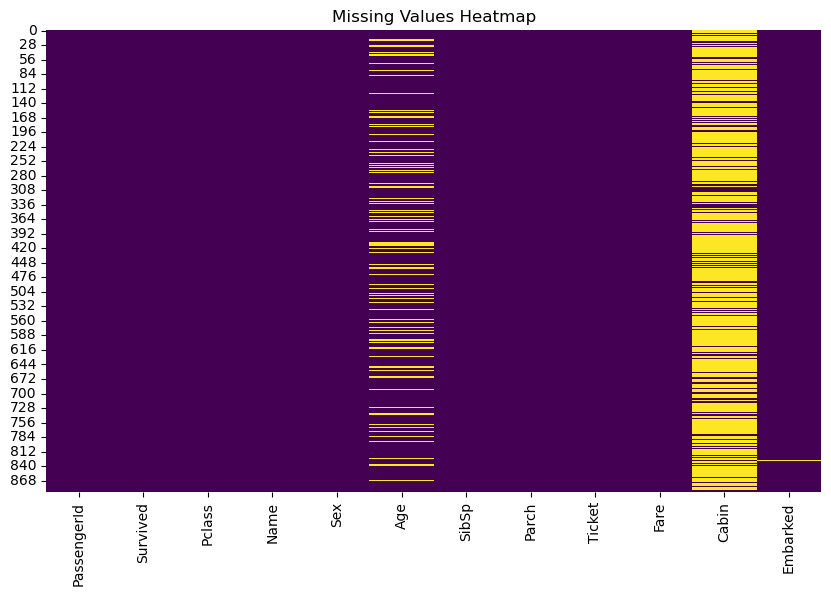

In [26]:
# Visualize Missing Data
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

Text(0.5, 1.0, 'Age Distribution')

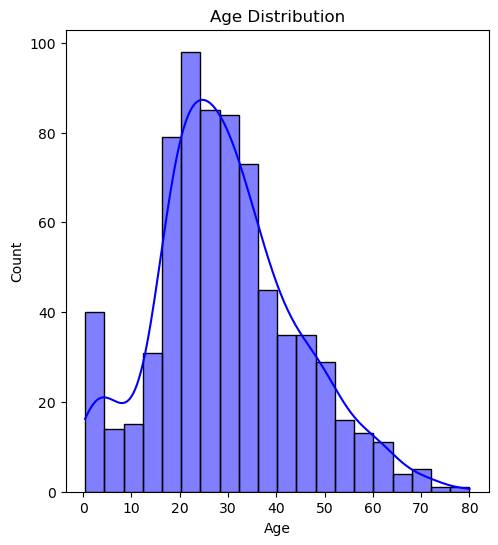

In [27]:
# Visualise the Distribution of Numerical Features (Age, Fare)
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(df['Age'].dropna(), kde=True, color='blue')
plt.title('Age Distribution')


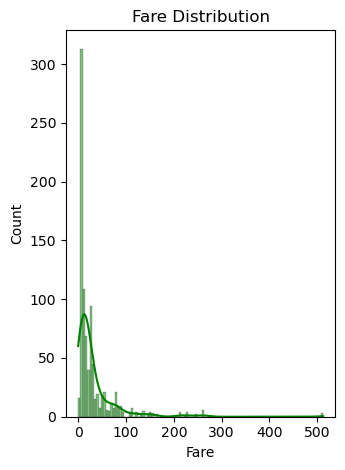

In [28]:
plt.subplot(1, 2, 2)
sns.histplot(df['Fare'], kde=True, color='green')
plt.title('Fare Distribution')
plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Sex Distribution')

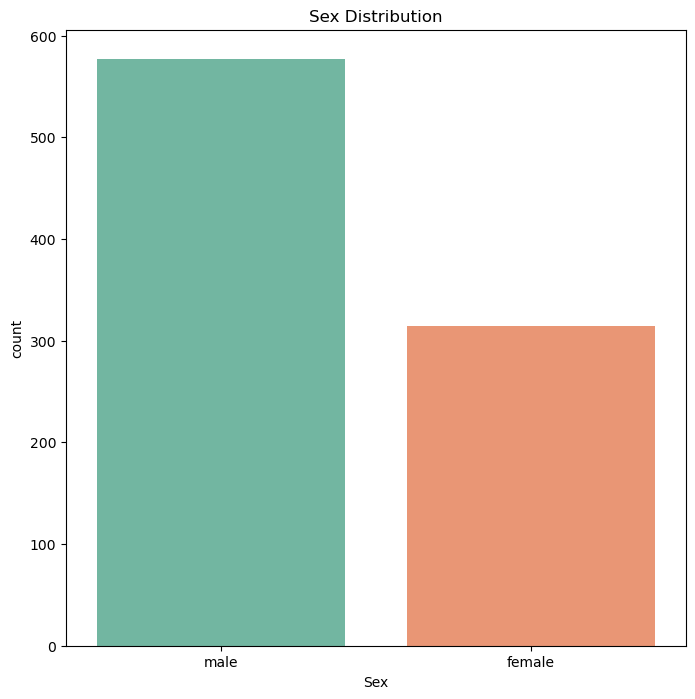

In [29]:
# Visualise Categorical Features Analysis (Sex, Embarked, Pclass)
plt.figure(figsize=(8, 8))

# Sex Distribution
#plt.subplot(1, 3, 1)
sns.countplot(x='Sex', data=df, palette='Set2')
plt.title('Sex Distribution')

Text(0.5, 1.0, 'Embarked Distribution')

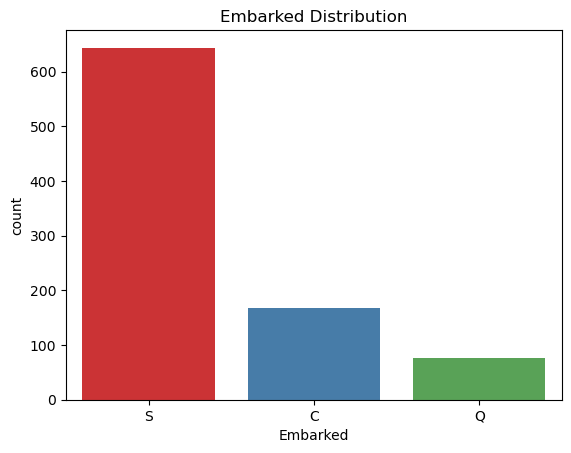

In [30]:
# Embarked Distribution
#plt.subplot(1, 3, 2)
sns.countplot(x='Embarked', data=df, palette='Set1')
plt.title('Embarked Distribution')

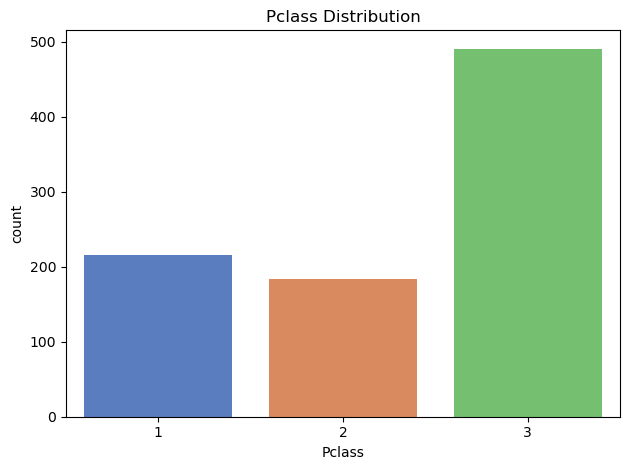

In [31]:
# Pclass Distribution
#plt.subplot(1, 3, 3)
sns.countplot(x='Pclass', data=df, palette='muted')
plt.title('Pclass Distribution')

plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Survived by Sex')

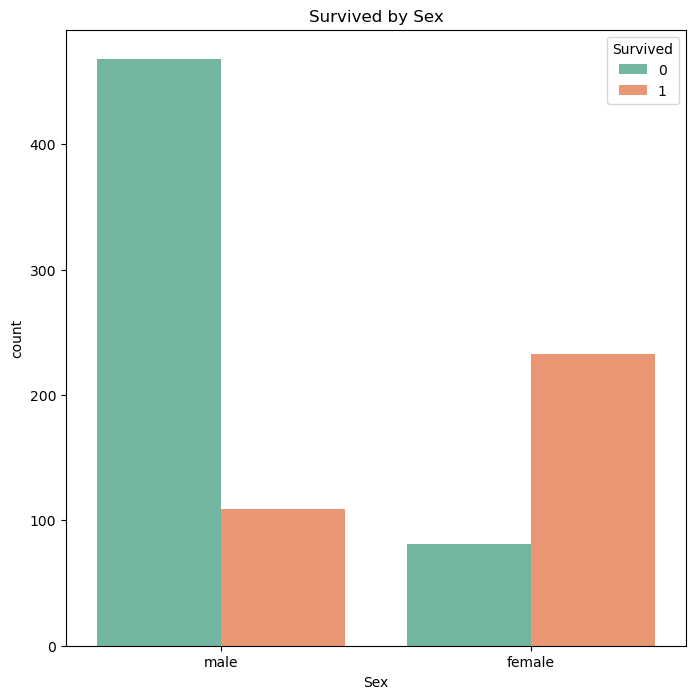

In [32]:
# Visualise Relationship Between Features and Target Variable (Survived)
plt.figure(figsize=(8, 8))

# Sex vs Survived
#plt.subplot(2, 3, 1)
sns.countplot(x='Sex', hue='Survived', data=df, palette='Set2')
plt.title('Survived by Sex')

Text(0.5, 1.0, 'Survived by Pclass')

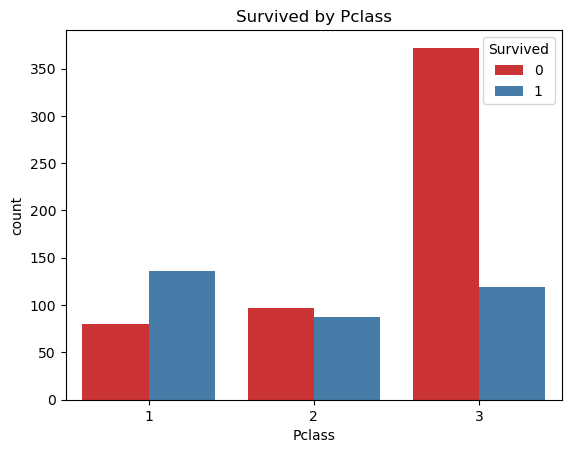

In [33]:
# Pclass vs Survived
#plt.subplot(2, 3, 2)
sns.countplot(x='Pclass', hue='Survived', data=df, palette='Set1')
plt.title('Survived by Pclass')

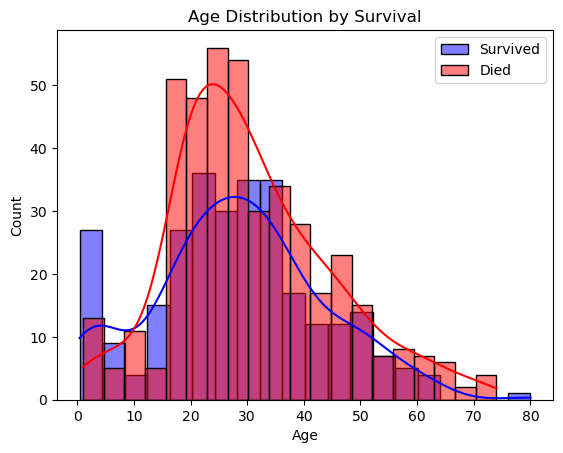

In [34]:
# Age vs Survived
#plt.subplot(2, 3, 3)
sns.histplot(df[df['Survived'] == 1]['Age'], kde=True, color='blue', label='Survived', bins=20)
sns.histplot(df[df['Survived'] == 0]['Age'], kde=True, color='red', label='Died', bins=20)
plt.title('Age Distribution by Survival')
plt.legend()

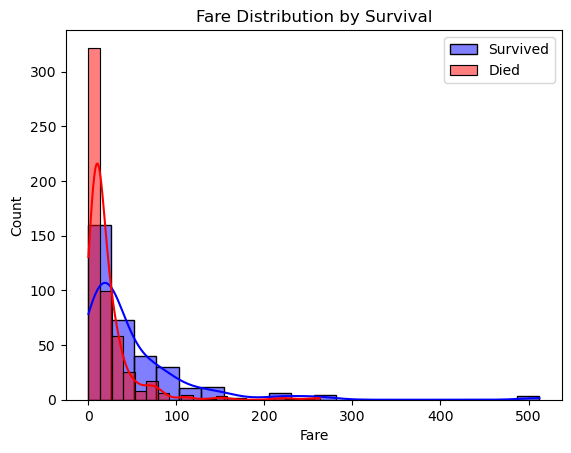

In [35]:
# Fare vs Survived
#plt.subplot(2, 3, 4)
sns.histplot(df[df['Survived'] == 1]['Fare'], kde=True, color='blue', label='Survived', bins=20)
sns.histplot(df[df['Survived'] == 0]['Fare'], kde=True, color='red', label='Died', bins=20)
plt.title('Fare Distribution by Survival')
plt.legend()

In [36]:
df.columns # check the columns in the dataframe

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [37]:
# Drop the 'PassengerId' column from the DataFrame
df.drop(columns=['PassengerId'], inplace=True)

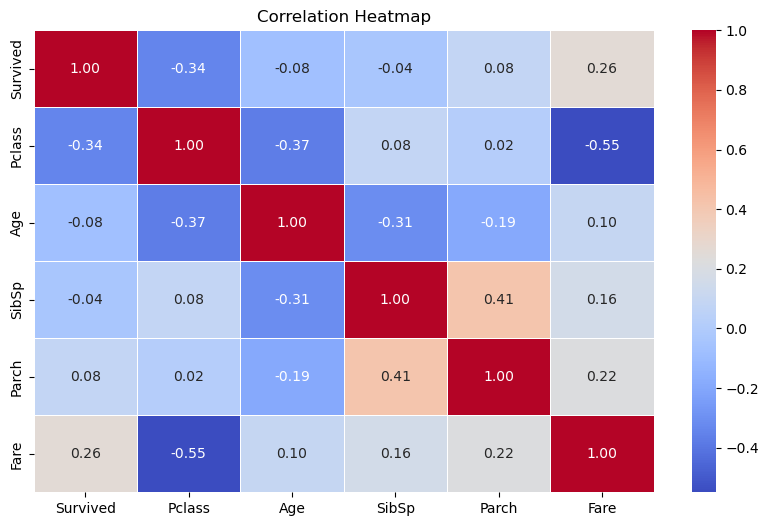

In [38]:
# Drop non-numeric columns for correlation analysis
df_numeric = df.select_dtypes(include=[np.number])

# Compute the correlation matrix for numerical features
correlation_matrix = df_numeric.corr()

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


In [39]:
# Handle missing values (impute or drop)
df['Age'].fillna(df['Age'].mean(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)
df.dropna(subset=['Fare'], inplace=True)  # Drop rows where 'Fare' is missing

In [40]:
# Drop irrelevant columns
df = df.drop(['Name', 'Ticket', 'Cabin'], axis=1)

In [41]:
# Convert categorical variables into numeric (using one-hot encoding for 'Sex' and 'Embarked')
df = pd.get_dummies(df, columns=['Sex', 'Embarked'], drop_first=True)


In [42]:
# Split data into features and target
X = df.drop('Survived', axis=1)  # Features
y = df['Survived']  # Target variable

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### 1)  Logistic Regression Model

In [43]:
# 2. Train the model without hyperparameter tuning

model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)


LogisticRegression(max_iter=200)

### Evaluate Model Performance

In [44]:
# 3. Evaluate model performance without tuning
y_pred = model.predict(X_test)
print("Accuracy without tuning: ", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy without tuning:  0.8100558659217877
              precision    recall  f1-score   support

           0       0.83      0.86      0.84       105
           1       0.79      0.74      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



####  Hyperparameter tuning using GridSearchCV

In [45]:
# Define hyperparameters for grid search
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'saga'],
    'penalty': ['l1', 'l2']
}


In [46]:
grid_search = GridSearchCV(LogisticRegression(max_iter=200), param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Best parameters from GridSearchCV
print("Best Parameters: ", grid_search.best_params_)

Best Parameters:  {'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}


In [47]:
# 4. Train the model with the best parameters
best_model = grid_search.best_estimator_
y_pred_tuned = best_model.predict(X_test)

### Evaluate the Model Performance

In [48]:
# Evaluate tuned model performance
print("Accuracy with tuning: ", accuracy_score(y_test, y_pred_tuned))
print(classification_report(y_test, y_pred_tuned))


Accuracy with tuning:  0.7988826815642458
              precision    recall  f1-score   support

           0       0.82      0.85      0.83       105
           1       0.77      0.73      0.75        74

    accuracy                           0.80       179
   macro avg       0.79      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179



In [49]:
# 5. ROC Curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, best_model.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)

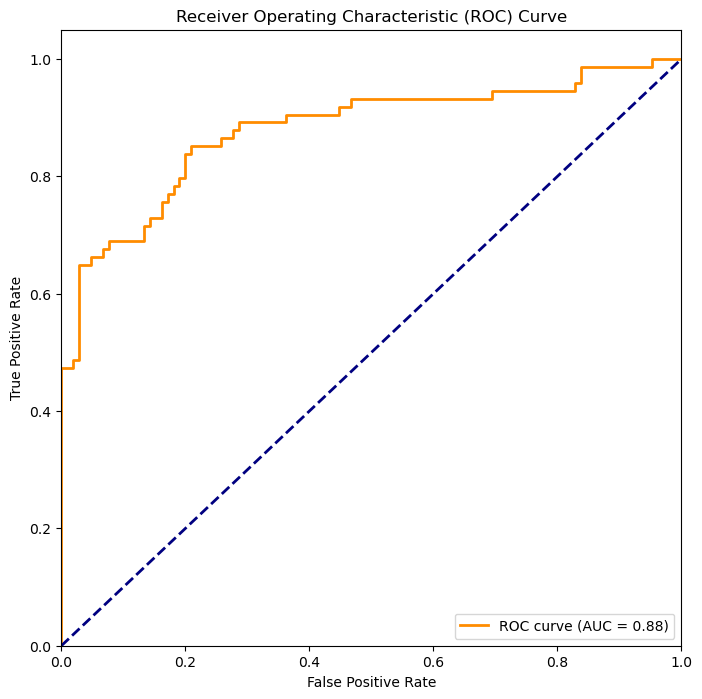

In [50]:
# Plot ROC Curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

#### Random Forest Model

In [51]:
# Train the Random Forest model without hyperparameter tuning
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

### Evaluate Model Performance

In [52]:
# Evaluate model performance
y_pred = rf_model.predict(X_test)
print("Accuracy without tuning: ", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy without tuning:  0.8044692737430168
              precision    recall  f1-score   support

           0       0.82      0.86      0.84       105
           1       0.78      0.73      0.76        74

    accuracy                           0.80       179
   macro avg       0.80      0.79      0.80       179
weighted avg       0.80      0.80      0.80       179



### Model Tuning

In [53]:
# Hyperparameter tuning using GridSearchCV

# Define hyperparameters for grid search
param_grid_rf = {
    'n_estimators': [50, 100, 150, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}


In [ ]:
grid_search_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid_rf, cv=5, n_jobs=-1)
grid_search_rf.fit(X_train, y_train)

# Best parameters from GridSearchCV
print("Best Parameters: ", grid_search_rf.best_params_)

In [ ]:
# 4. Train the model with the best parameters
best_rf_model = grid_search_rf.best_estimator_
y_pred_tuned_rf = best_rf_model.predict(X_test)

### Evaluate Model Performance 

In [ ]:
# Evaluate tuned model performance
print("Accuracy with tuning: ", accuracy_score(y_test, y_pred_tuned_rf))
print(classification_report(y_test, y_pred_tuned_rf))

In [ ]:
# ROC Curve and AUC
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, best_rf_model.predict_proba(X_test)[:, 1])
roc_auc_rf = auc(fpr_rf, tpr_rf)


In [ ]:
# Plot ROC Curve
plt.figure(figsize=(8, 8))
plt.plot(fpr_rf, tpr_rf, color='darkorange', lw=2, label=f'Random Forest ROC curve (AUC = {roc_auc_rf:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Random Forest')
plt.legend(loc="lower right")
plt.show()